In [2]:
#Importing Essential Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
#We Load The Titanic Dataset
df=pd.read_csv(r"D:\Thiru\ML_Projects\Titanic-Survival-Prediction\Data\Raw Data\train.csv")

In [4]:
#First Five Rows In Each Columns
print(df.head(5))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
#last Five Rows In Each Columns
print(df.tail(5))

     PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q  


In [13]:
#Basic Info
print(df.info())
print('\n')
print(df.shape)
print('\n')
print(df.columns)
print('\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


(891, 12)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


       PassengerId    Survived      Pclass         Age       SibSp  \


In [ ]:
#Missing Values
print(df.isnull().sum())

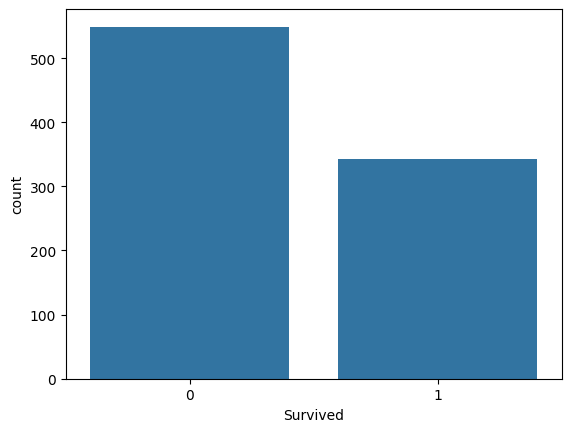

In [6]:
# Survival counts
sns.countplot(x="Survived", data=df)
plt.show()

### Overall Survival Counts
- This countplot shows the total number of passengers who survived (1) versus those who did not (0).  
- It provides a quick visual understanding of the **distribution of the target variable**.  
- From the plot, we can see that more passengers did not survive than survived.

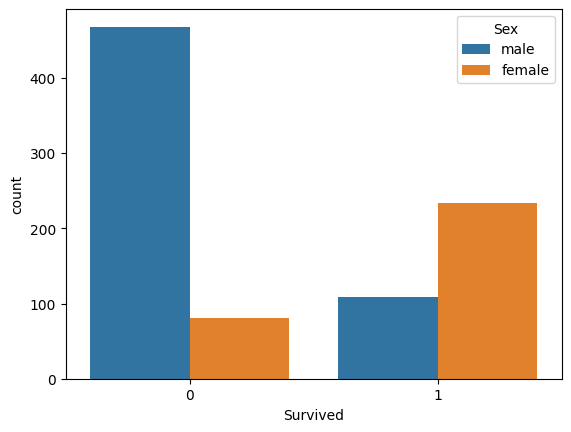

In [7]:
#Survival by gender
sns.countplot(x="Survived", hue="Sex", data=df)
plt.show()

### Survival by Gender
- This countplot shows the number of passengers who survived (1) versus those who did not (0), **split by gender**.  
- From the plot, we can see that a higher proportion of females survived compared to males.  
- This suggests that gender played a significant role in survival on the Titanic.

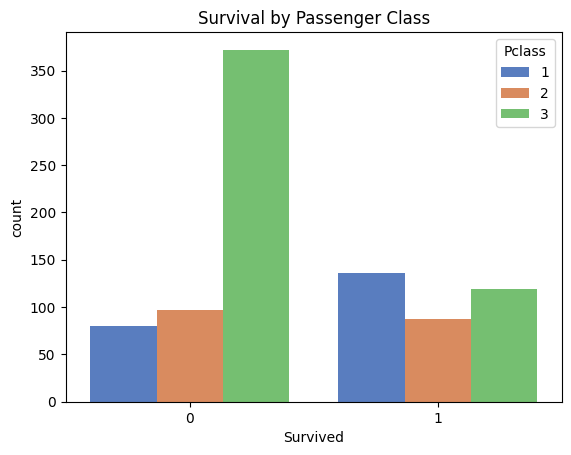

In [8]:
#Survival by Passenger Class
sns.countplot(x="Survived", hue="Pclass", data=df, palette="muted")
plt.title("Survival by Passenger Class")
plt.show()

### Survival by Passenger Class
- This countplot shows survival counts (0 = did not survive, 1 = survived) **split by passenger class (Pclass)**.  
- From the plot, we can observe that **first-class passengers had higher survival rates** compared to second- and third-class passengers.  
- This suggests that passenger class had a strong impact on survival during the Titanic disaster.

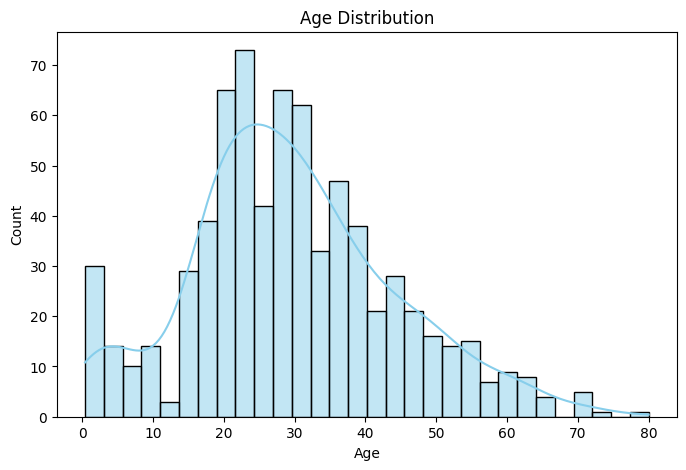

In [9]:
#Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution")
plt.show()

### Age Distribution
- This histogram shows the distribution of passengers' ages in the dataset.  
- The KDE (Kernel Density Estimate) curve helps visualize the underlying age distribution.  
- We can see that most passengers were between **20 and 40 years old**, with fewer children and elderly passengers.  
- This information is useful for understanding the age demographics and for handling missing age values later.

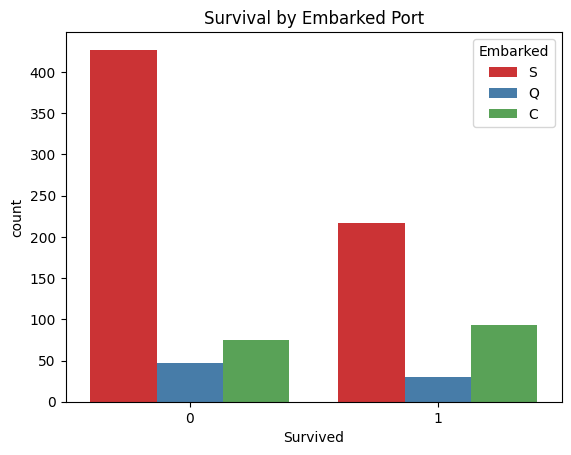

In [10]:
#Survival by Embarked Port
sns.countplot(x="Survived", hue="Embarked", data=df, palette="Set1")
plt.title("Survival by Embarked Port")
plt.show()

### Survival by Embarked Port
- This countplot shows the number of passengers who survived (1) vs. did not survive (0), **split by their port of embarkation**.  
- From the plot, we can observe differences in survival rates based on the embarkation point (C = Cherbourg, Q = Queenstown, S = Southampton).  
- This suggests that the port of embarkation may have had some influence on survival, possibly due to differences in passenger class distribution.

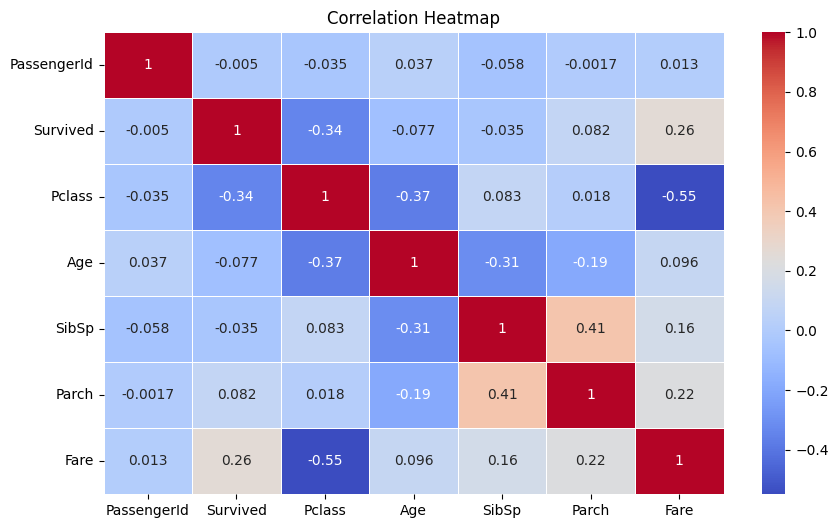

In [11]:
#Correlation Heatmap
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Correlation Heatmap
- This heatmap shows the correlation between **numerical features** in the Titanic dataset.  
- Values close to **1 or -1** indicate strong positive or negative correlations, respectively.  
- From the heatmap, we can observe that **Pclass and Fare** are negatively correlated, meaning higher-class passengers tended to pay higher fares.  
- Correlations with **Survived** can help identify features that are more important for predicting survival.